# Project 4, APS1070 Summer 2020
#### **Linear Regression -  20 points**
**Deadline: Aug 2, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: **Jiani Jia**
*   Your **student number**: **1002226245**



## Part 1 - Getting Started [1 mark]

In this project, we are designing a controller to manage the ailerons of an F16 Aircraft! 
![Ailerons](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/airplane.gif) [Ref](https://www.grc.nasa.gov/www/k-12/BGA/Mike/airplane_parts_act.htm) 


The features describe the airplane's status, and the target is to predict the `Goal` column, which is a command that our controller should issue.

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/aps1070-2019/datasets/master/F16L.csv" , skipinitialspace=True)

1. Split the dataset into training/validation sets (80% training, 20% validation). Note: While splitting use the value of **random state=41**.
2. Standardize the data using StandardScaler from sklearn.

In [3]:
## Split the dataset into training/validation sets
data = df.drop(columns = 'Goal')
target = df['Goal']
X_train, X_val, y_train, y_val = train_test_split(data, target, test_size = 0.2, random_state = 41)

In [4]:
## Standardize the data using StandardScaler from sklearn
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train) 
X_val_std = scaler.transform(X_val)

## Part 2 - Direct Solution [1 mark]

Implement the direct solution for linear regression on the dataset above (without regularizer).
Report training and validation error.

In [5]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

In [6]:
## Expanded x and x_val
X = np.vstack((np.ones(np.shape(X_train_std)[0]), X_train_std.T)).T
X_val = np.vstack((np.ones(np.shape(X_val_std)[0]), X_val_std.T)).T

In [7]:
def direct_soultion(X, X_val, Y, Y_val):
  opt_weight = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, np.array(Y).reshape(-1,1)))
  yPred_train = np.dot(X, opt_weight)
  RMSE = rmse(yPred_train, Y)
  print('The taining error for direct solution (without regularizer) is', RMSE)

  yPred_val = np.dot(X_val, opt_weight)
  RMSE_val = rmse(yPred_val, Y_val)
  print('The validation error for direct solution (without regularizer) is', RMSE_val)
  return opt_weight, RMSE, RMSE_val

In [8]:
opt_weight, RMSE_ds, RMSE_val_ds = direct_soultion(X, X_val, y_train, y_val)

The taining error for direct solution (without regularizer) is 0.0001820497133152199
The validation error for direct solution (without regularizer) is 0.00018282578955074112


## Part 3 - Gradient Descent (GD) [2 marks]

1. Implement gradient descent (full-batch) for linear regression using a fixed learning rate of $\alpha= 1e-2$. You should compute the gradients yourself! First try to implement it without looking at other resources, but if you need a hint take a look [here](https://towardsdatascience.com/gradient-descent-explanation-implementation-c74005ff7dd1) and [here](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results are closely approximate the direct solution.

In [9]:
## Implement gradient descent (full-batch) for linear regression using a fixed learning rate
def gradient_descent (X, X_val, y_train, y_val, learning_rate, epoch):
  N = X.shape[0]
  W = np.zeros([X.shape[1]]).reshape(-1,1)
  W_deriv = np.zeros([X.shape[1]]).reshape(-1,1)
  RMSE = []
  RMSE_val = []
  for i in range (epoch):
    W_deriv = -(1/N) * (np.dot(X.T, (np.array(y_train).reshape(-1,1) - np.dot(X, W))))
    W = W - learning_rate * W_deriv.reshape(-1,1)
    yPred = np.dot(X, W)
    train_error = rmse(yPred, y_train)
    yPred_val = np.dot(X_val, W)
    val_error = rmse(yPred_val, y_val)
    RMSE.append(train_error)
    RMSE_val.append(val_error)
    if i % 50 == 0:
      print ('Epochs : ', i, ' Training Error : ', train_error, ' Validation Error : ', val_error)
  return W, RMSE, RMSE_val

In [10]:
## Run the gradient descent for a fixed number of epochs 
learning_rate = 0.01
epoch = 350
W_GD, RMSE_GD, RMSE_val_GD = gradient_descent(X, X_val, y_train, y_val, learning_rate, epoch)

Epochs :  0  Training Error :  0.0009427276218025017  Validation Error :  0.0009422290835588615
Epochs :  50  Training Error :  0.000574416873586751  Validation Error :  0.0005705065161432148
Epochs :  100  Training Error :  0.0003768086397688992  Validation Error :  0.0003731598575239172
Epochs :  150  Training Error :  0.00026884844117108065  Validation Error :  0.0002653857278270497
Epochs :  200  Training Error :  0.000215149980395862  Validation Error :  0.00021198670460815885
Epochs :  250  Training Error :  0.0001911168532733887  Validation Error :  0.00018832139904241527
Epochs :  300  Training Error :  0.00018114673582626058  Validation Error :  0.0001786728973302779


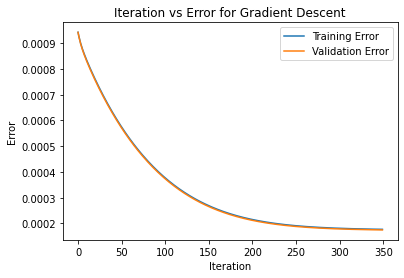

In [11]:
plt.plot(RMSE_GD, label = 'Training Error')
plt.plot(RMSE_val_GD, label = 'Validation Error')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Iteration vs Error for Gradient Descent')
plt.show()

**Verify that the results are closely approximate the direct solution.**

For gradient descent, after 300 epochs the training error is approximate to the training error that get from direct solution, and after 250 epochs the validation error is approximate to the direct solution.
 
****

## Part 4 - Mini-batch and Stochastic Gradient Descent [3 marks]

When B=1, we call that stochastic gradient descent.  When B=#train data points, it is full-batch (ie all data points are used, every cycle). Anywhere in between is mini-batch (we use some of the data).  

1. Implement Mini-batch Gradient Descent. 
First try to implement it without looking at other resources, but if you need a hint take a look [here](https://towardsdatascience.com/gradient-descent-explanation-implementation-c74005ff7dd1) and [here](https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html).

2. Sweep different values for the mini-batch size (including 1 -- Stochastic GD) with a fixed learning rate and report your findings on a plot (training error and validation error vs. iterations).

In [12]:
def mini_bitch(X, X_val, Y, Y_val, learning_rate, epoch, mini_size):
  split = int((1/mini_size) * X.shape[0])
  N = mini_size
  RMSE = []
  RMSE_val = []
  W = np.zeros([41]).reshape(-1,1)
  for i in range (epoch):
    W_deriv = np.zeros([41])
    for j in range(split):
      X_mini = X[j*mini_size:(j+1)*mini_size,:] 
      Y_mini = np.array(Y[j*mini_size:(j+1)*mini_size]).reshape(-1,1)
      W_deriv = -(1/N) * (np.dot(X_mini.T, (Y_mini - np.dot(X_mini, W))))
      W = W - learning_rate * W_deriv.reshape(-1,1)
      yPred = np.dot(X, W).reshape(-1,1)
      train_error = rmse(yPred, Y)
      yvalPred = np.dot(X_val, W).reshape(-1,1)
      val_error = rmse(yvalPred, Y_val)
      RMSE.append(train_error)
      RMSE_val.append(val_error)
  return W, RMSE, RMSE_val

In [ ]:
W_b1, RMSE_b1, RMSE_val_b1 = mini_bitch(X, X_val, y_train, y_val, 0.0001, 10, 1)  # Batch size = 1
j1 = [i for i in RMSE_b1 if i >= 0.00018]
print('After ', len(j1), 'iterations, the training error for batch size = 1 is reached to 0.00018')
p1 = [i for i in RMSE_val_b1 if i >= 0.00018]
print('After ', len(p1), 'iterations, the validation error for batch size = 1 is reached to 0.00018')

After  31485 iterations, the training error for batch size = 1 is reached to 0.00018
After  29103 iterations, the validation error for batch size = 1 is reached to 0.00018


In [ ]:
W_b2, RMSE_b2, RMSE_val_b2 = mini_bitch(X, X_val, y_train, y_val, 0.0001, 100, 10) # Batch size = 10
j2 = [i for i in RMSE_b2 if i >= 0.00018]
print('After ', len(j2), 'iterations, the training error for batch size = 10 is reached to 0.00018')
p2 = [i for i in RMSE_val_b2 if i >= 0.00018]
print('After ', len(p2), 'iterations, the validation error for batch size = 10 is reached to 0.00018')

After  31285 iterations, the training error for batch size = 10 is reached to 0.00018
After  29221 iterations, the validation error for batch size = 10 is reached to 0.00018


In [ ]:
W_b3, RMSE_b3, RMSE_val_b3 = mini_bitch(X, X_val, y_train, y_val, 0.0001, 1000, 100) # Batch size = 100
j3 = [i for i in RMSE_b3 if i >= 0.00018]
print('After ', len(j3), 'iterations, the training error for batch size = 100 is reached to 0.00018')
p3 = [i for i in RMSE_val_b3 if i >= 0.00018]
print('After ', len(p3), 'iterations, the validation error for batch size = 100 is reached to 0.00018')

After  31274 iterations, the training error for batch size = 100 is reached to 0.00018
After  29208 iterations, the validation error for batch size = 100 is reached to 0.00018


In [ ]:
W_b4, RMSE_b4, RMSE_val_b4 = mini_bitch(X, X_val, y_train, y_val, 0.0001, 10000, 1000)  # Batch size = 1000
j4 = [i for i in RMSE_b4 if i >= 0.00018]
print('After ', len(j4), 'iterations, the training error for batch size = 1000 is reached to 0.00018')
p4 = [i for i in RMSE_val_b4 if i >= 0.00018]
print('After ', len(p4), 'iterations, the validation error for batch size = 1000 is reached to 0.00018')

After  31273 iterations, the training error for batch size = 1000 is reached to 0.00018
After  29206 iterations, the validation error for batch size = 1000 is reached to 0.00018


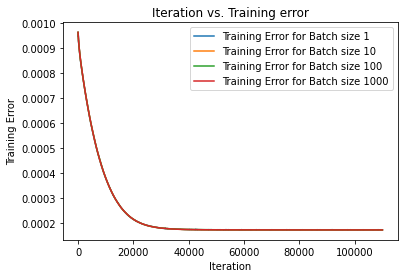

In [ ]:
## Plot Iteration vs Traing error for different batch size
plt.plot(RMSE_b1,  label = 'Training Error for Batch size 1')
plt.plot(RMSE_b2, label = 'Training Error for Batch size 10')
plt.plot(RMSE_b3, label = 'Training Error for Batch size 100')
plt.plot(RMSE_b4, label = 'Training Error for Batch size 1000')
plt.xlabel('Iteration')
plt.ylabel('Training Error')
plt.legend()
plt.title('Iteration vs. Training error')
plt.show()

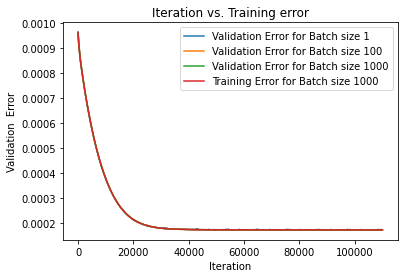

In [ ]:
## Plot Iteration vs Validation error for different batch size
plt.plot(RMSE_val_b1, label = 'Validation Error for Batch size 1')
plt.plot(RMSE_val_b2, label = 'Validation Error for Batch size 100')
plt.plot(RMSE_val_b3, label = 'Validation Error for Batch size 1000')
plt.plot(RMSE_val_b4, label = 'Training Error for Batch size 1000')
plt.xlabel('Iteration')
plt.ylabel('Validation  Error')
plt.legend()
plt.title('Iteration vs. Training error')
plt.show()

**Note:** 

Above plots cannot show clearly which batch size has the fastest convergence, so I count how many iterations will decrease the training error to 0.00018. The result shows when batch size = 1000, after 31273 iterations the training error reaches to 0.00018, it is faster than the batch size = 1 and 100. Using the large batch size will lead the RMSE fast converge.
**** 

## Part 5 - Learning Rate [2 marks]
Select the best batch size based on fastest convergence (number of times you update the weights) and sweep the learning rate while applying Mini-batch GD. Report your findings on a plot.


In [13]:
# Learning rate = 0.0001
W_r1, RMSE_r1, RMSE_val_r1 = mini_bitch(X, X_val, y_train, y_val, 0.0001, 1000, 1000)  

In [ ]:
# Learning rate = 0.001
W_r2, RMSE_r2, RMSE_val_r2 = mini_bitch(X, X_val, y_train, y_val, 0.001, 1000, 1000)  

In [ ]:
# Learning rate = 0.01
W_r3, RMSE_r3, RMSE_val_r3 = mini_bitch(X, X_val, y_train, y_val, 0.01, 1000, 1000)  

In [ ]:
# Learning rate = 0.1
W_r4, RMSE_r4, RMSE_val_r4 = mini_bitch(X, X_val, y_train, y_val, 0.1, 1000, 1000)  

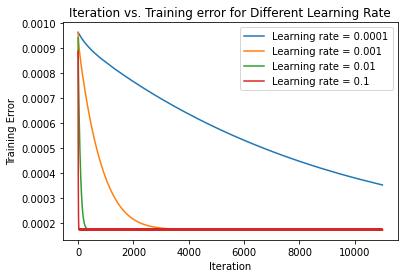

In [ ]:
## Plot Iteration vs Training error for different learning rate
plt.plot(RMSE_r1, label = 'Learning rate = 0.0001')
plt.plot(RMSE_r2, label = 'Learning rate = 0.001')
plt.plot(RMSE_r3, label = 'Learning rate = 0.01')
plt.plot(RMSE_r4, label = 'Learning rate = 0.1')
plt.xlabel('Iteration')
plt.ylabel('Training Error')
plt.legend()
plt.title('Iteration vs. Training error for Different Learning Rate')
plt.show()

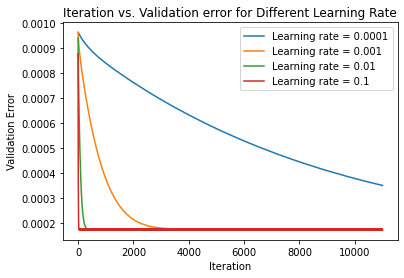

In [ ]:
## Plot Iteration vs Validation error for different learning rate
plt.plot(RMSE_val_r1, label = 'Learning rate = 0.0001')
plt.plot(RMSE_val_r2, label = 'Learning rate = 0.001')
plt.plot(RMSE_val_r3, label = 'Learning rate = 0.01')
plt.plot(RMSE_val_r4, label = 'Learning rate = 0.1')
plt.xlabel('Iteration')
plt.ylabel('Validation Error')
plt.legend()
plt.title('Iteration vs. Validation error for Different Learning Rate')
plt.show()

**Note:**

According to the above plots, when learning rate = 0.1, it converges fastest compared to other value of learning rate. Larger learning rate results in faster converge.
****




## Part 6 - Regularizers [4 marks]



1.   Formula (use a text cell --markdown-- and write in latex): 
  *   Derive the Direct solution formula when a L1 regularizer ($\lambda_1$) is employed.
  *   Derive the Direct solution formula when a L2 regularizer ($\lambda_2$) is employed.
  *   Derive the Gradient Descent weight update formula when the L1 regularizer is employed.
  *   Derive the Gradient Descent weight update formula when the L2 regularizer is employed.



2.   Evaluation:

  *  Apply L1 and L2 regularizers (separately) to the direct solution and plot train and validation error as a function of the $\lambda$. Find the best regularizer ($\lambda$) values to use in the next steps.

    *   Plot mini-batch GD train error and validation error when $\lambda_1$ regularizer is employed. (X-axis: iterations)

    *   Plot mini-batch GD train error and validation error when $\lambda_2$ regularizer is employed. (X-axis: iterations)



* Summarize your findings and explain whether L1 or L2 regularizers are helping the GD convergence. Is it always safe to use a L1 regularizer? How about L2?



****
**Derive the Direct solution formula when a L1 regularizer ($\lambda_1$) is employed**.

With 𝐿1 Regularization. Cost:

$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda_1\sum_{j=1}^n|w_j|]$ 

$J(w) = \frac{1}{2N}[||Xw-t||^2 + \lambda_1|w_j|]$ 

To derive the direct solution for L1 regularizer, $\frac{\partial J(w)}{\partial w} = 0$, but we cannot obtain the close form solution for global minimum, since the above is non-differentiable when $w_j = 0$. We cannot derive the direct solution for L1 regularizer.

**Derive the Direct solution formula when a L2 regularizer ($\lambda_2$) is employed.**

With 𝐿2 Regularization. Cost:

$J(w) = \frac{1}{2N}[\sum_{i=1}^N(h_w (x^{(i)}) - t^{(i)})^2 + \lambda_2\sum_{j=1}^nw^2_j]$ 

$J(w) = \frac{1}{2N}[||Xw-t||^2 + \lambda_2||w_j||^2]$ 

$\frac{\partial J(w)}{\partial w} = 0$

$2X^TXw-2X^Tt+2\lambda_2w = 0$

$w = (X^TX + \lambda I)^{-1}X^Tt$

**Derive the Gradient Descent weight update formula when the L1 regularizer is employed.**

$\begin{equation}
\frac{d|w|}{dw} =\left\{
\begin{aligned}
1\ \ w_i>0\\
-1\ \ w_i<0
\end{aligned}
\right.
\end{equation}$

$w = w - \alpha\frac{\partial J(w)}{\partial w}$

$\begin{equation}
\frac{\partial J(w)}{\partial w} =\left\{
\begin{aligned}
\frac{1}{2N}\ [2X^TXw-2X^Tt+\lambda_1]\ \ w_i>0\\
\frac{1}{2N}\ [2X^TXw-2X^Tt-\lambda_1]\ \ w_i<0
\end{aligned}
\right.
\end{equation}$

$w = w - \frac{\alpha}{2N}\ \ [2X^TXw-2X^Tt+\lambda_1sign(w_j)]$

**Derive the Gradient Descent weight update formula when the L2 regularizer is employed.**

$w = w - \alpha\frac{\partial J(w)}{\partial w}$

$w = w - \frac{\alpha}{2N}\ [2X^TXw-2X^Tt+2\lambda_2w]$
****


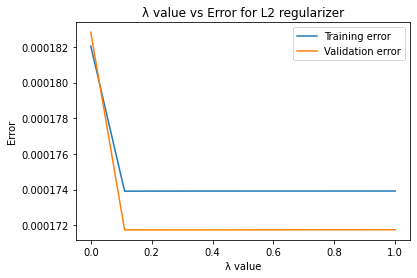

In [14]:
## Apply L2 regularizers to the direct solution and plot train and validation error as a function of the  𝜆 
train_error_list = []
val_error_list = []
for λ in range(0, 10, 1):
  weight_L2 = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ*0.1)*np.identity(41)), np.dot(X.T, y_train))
  yPred_L2 = np.dot(X, weight_L2)
  train_error = rmse(yPred_L2, y_train)
  train_error_list.append(train_error)
  yPred_L2_val = np.dot(X_val, weight_L2)
  val_error = rmse(yPred_L2_val, y_val)
  val_error_list.append(val_error)
plt.plot(np.linspace(0, 1, 10), train_error_list, label = 'Training error')
plt.plot(np.linspace(0, 1, 10), val_error_list, label = 'Validation error')
plt.legend()
plt.xlabel('λ value')
plt.ylabel('Error')
plt.title('λ value vs Error for L2 regularizer')
plt.show()

In [15]:
## Find the best regularizer (𝜆) values
λ_value = np.linspace(0, 1, 11)
min_index = train_error_list.index(min(train_error_list))
min_λ = λ_value[min_index]
print('The minimun λ value for L2 regularizer is ', min_λ)

The minimun λ value for L2 regularizer is  0.1


In [16]:
## Plot mini-batch GD train error and validation error when L1 regularizer
def L1_mini_GD(X, X_val, Y, Y_val, learning_rate, epoch, mini_size, λ):
  split = int((1/mini_size) * X.shape[0])
  N = mini_size
  RMSE = []
  RMSE_val = []
  W = np.zeros([41]).reshape(-1,1)
  for i in range (epoch):
    W_deriv = np.zeros([41])
    for j in range(split):
      X_mini = X[j*mini_size:(j+1)*mini_size,:] 
      Y_mini = np.array(Y[j*mini_size:(j+1)*mini_size]).reshape(-1,1)
      W_deriv = (1/N) * (np.dot(np.dot(X_mini.T, X_mini), W) - np.dot(X_mini.T, Y_mini) + 𝜆 * np.sign(W))
      W = W - learning_rate * W_deriv.reshape(-1,1)
      yPred = np.dot(X, W).reshape(-1,1)
      train_error = rmse(yPred, Y)
      yvalPred = np.dot(X_val, W).reshape(-1,1)
      val_error = rmse(yvalPred, Y_val)
      RMSE.append(train_error)
      RMSE_val.append(val_error)
  return W, RMSE, RMSE_val

In [17]:
## Find the minimun value of the training error and validation error 
## Batch size = 1000, epoch = 100, L1 regularizer = 0.1
W_L1, RMSE_L1, RMSE_val_L1 =  L1_mini_GD(X, X_val, y_train, y_val, 0.01, 100, 1000, 0.1)
print('The minimun of the training error for mini batch GD L1 regularizer is', min(RMSE_L1))
print('The minimun of the validation error for mini batch GD L1 regularizer is', min(RMSE_val_L1))

The minimun of the training error for mini batch GD L1 regularizer is 0.00027197544347545193
The minimun of the validation error for mini batch GD L1 regularizer is 0.00026677994014030206


In [39]:
## Plot mini-batch GD train error and validation error when L1 regularizer using Lasso
def L1_mini_GD_Lasso(X, X_val, Y, Y_val, learning_rate, epoch, mini_size, λ):
  split = int((1/mini_size) * X.shape[0])
  N = mini_size
  RMSE = []
  RMSE_val = []
  W = np.zeros([41]).reshape(-1,1)
  for i in range (epoch):
    W_deriv = np.zeros([41])
    for j in range(split):
      X_mini = X[j*mini_size:(j+1)*mini_size,:] 
      Y_mini = np.array(Y[j*mini_size:(j+1)*mini_size]).reshape(-1,1)
      clf = linear_model.Lasso(alpha = λ)
      clf.fit(X, Y)
      W_deriv = (1/N) * (np.dot(np.dot(X_mini.T, X_mini), W) - np.dot(X_mini.T, Y_mini) + 𝜆 * clf.coef_.reshape(-1,1))
      W = W - learning_rate * W_deriv.reshape(-1,1)
      yPred = np.dot(X, W).reshape(-1,1)
      train_error = rmse(yPred, Y)
      yvalPred = np.dot(X_val, W).reshape(-1,1)
      val_error = rmse(yvalPred, Y_val)
      RMSE.append(train_error)
      RMSE_val.append(val_error)
  return W, RMSE, RMSE_val

In [40]:
W_L1_Lasso, RMSE_L1_Lasso, RMSE_val_L1_Lasso =  L1_mini_GD_Lasso(X, X_val, y_train, y_val, 0.01, 100, 1000, 0.1)

In [41]:
## Plot mini-batch GD train error and validation error when L2  regularizer 
def L2_mini_GD(X, X_val, Y, Y_val, learning_rate, epoch, mini_size, λ):
  split = int((1/mini_size) * X.shape[0])
  N = mini_size
  RMSE = []
  RMSE_val = []
  W = np.zeros([41]).reshape(-1,1)
  for i in range (epoch):
    W_deriv = np.zeros([41])
    for j in range(split):
      X_mini = X[j*mini_size:(j+1)*mini_size,:] 
      Y_mini = np.array(Y[j*mini_size:(j+1)*mini_size]).reshape(-1,1)
      W_deriv = (1/N) * (np.dot(np.dot(X_mini.T, X_mini), W) - np.dot(X_mini.T, Y_mini) + 𝜆 * W)
      W = W - learning_rate * W_deriv.reshape(-1,1)
      yPred = np.dot(X, W).reshape(-1,1)
      train_error = rmse(yPred, Y)
      yvalPred = np.dot(X_val, W).reshape(-1,1)
      val_error = rmse(yvalPred, Y_val)
      RMSE.append(train_error)
      RMSE_val.append(val_error)
  return W, RMSE, RMSE_val

In [42]:
W_L2, RMSE_L2, RMSE_val_L2 =  L2_mini_GD(X, X_val, y_train, y_val, 0.01, 100, 1000, 0.1)

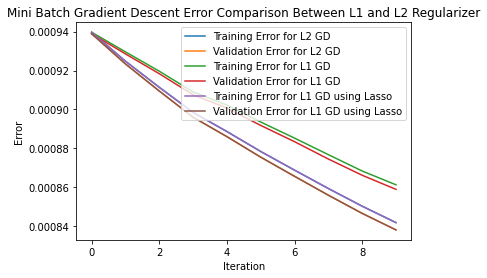

In [49]:
plt.plot(RMSE_L2[0:10], label = 'Training Error for L2 GD')
plt.plot(RMSE_val_L2[0:10], label = 'Validation Error for L2 GD')
plt.plot(RMSE_L1[0:10], label = 'Training Error for L1 GD')
plt.plot(RMSE_val_L1[0:10], label = 'Validation Error for L1 GD')
plt.plot(RMSE_L1_Lasso[0:10], label = 'Training Error for L1 GD using Lasso')
plt.plot(RMSE_val_L1_Lasso[0:10], label = 'Validation Error for L1 GD using Lasso')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Mini Batch Gradient Descent Error Comparison Between L1 and L2 Regularizer')
plt.show()

**Summarize your findings and explain whether L1 or L2 regularizers are helping the GD convergence. Is it always safe to use a L1 regularizer? How about L2?**

L1 regularizer results in higher error than L2 regularizer at the same iteration and converge slower than L2. But if applying Lasso to L1 regularizer, the resulting training errror and validaiton error will be same as L2 regularizer, the plotted curves are covered with each other.

The difference between L1 and L2 is L1 is the sum of weights and L2 is just the sum of the square of weights. L1 cannot be used in gradient based approaches since it is not-differentiable unlike L2. So that L1 regularizer is not always safe, it cannot has a direct solution. And in the gradient descent, when using Lasso, weights can become zero and eliminated. For L2 regularizer, it is more efficient since it has a direct solution and all weights are shrunk by the same factor.
****

## Part 7 - Introducing Momentum [4 marks]

Momentum is a popular technique that helps the gradient descent algorithm to converge faster. Simply, it behaves like a moving average of gradients. First, take a look at [here](https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d) to get familiar with the concept.

To summarize, If the weight update formula in the time-step $t$ is $w_t = w_{t-1} - \alpha~g_t$, the $g_t$ using momentum could be computed as $g_t = \beta~g_{t-1} + (1-\beta) \frac{{\partial J}}{\partial w}$. $\beta$ is the momentum coefficient, between [0, 1]. Weight updates ($g_t$) with momentum are not only computed based on the derivative of the loss function but also is a function of previous weight updates.

If you put $\beta=0$ in the $g_t$ equation, it would be the original gradient descent method. 

Train a linear model with a regularizer and various values of momentums. Plot your training and validation error for each iteration. Comment on the effect of momentum.

In [ ]:
def momentum (X, X_val, Y, Y_val, learning_rate, epoch, λ, beta):
  N = X.shape[0]
  W = np.zeros([41]).reshape(-1,1)
  Y = np.array(Y).reshape(-1,1)
  W_deriv = np.zeros([41]).reshape(-1,1)
  g = np.zeros([41]).reshape(-1,1)
  RMSE = []
  RMSE_val = []
  for i in range (epoch):
    W_deriv = (1/N) * (np.dot(np.dot(X.T, X), W) - np.dot(X.T, Y) + 𝜆 * W)
    g = beta * g + (1-beta) * W_deriv.reshape(-1,1)
    W = W - learning_rate * g
    yPred = np.dot(X, W).reshape(-1,1)
    train_error = rmse(yPred, Y)
    yPred_val = np.dot(X_val, W)
    val_error = rmse(yPred_val, Y_val)
    RMSE.append(train_error)
    RMSE_val.append(val_error)
  return W, RMSE, RMSE_val

In [ ]:
W_mom_0, RMSE_mom_0, RMSE_val_mom_0 = momentum(X, X_val, y_train, y_val, 0.01, 1000, 0.1, 0)
j0 = [i for i in RMSE_mom_0 if i >= 0.00018]
print('After ', len(j0), 'iterations, the training error for momuntum coefficient = 0 is reached to 0.00018')
p0 = [i for i in RMSE_val_mom_0 if i >= 0.00018]
print('After ', len(p0), 'iterations, the validation error for momuntum coefficient = 0 is reached to 0.00018')

After  311 iterations, the training error for momuntum coefficient = 0 is reached to 0.00018
After  290 iterations, the validation error for momuntum coefficient = 0 is reached to 0.00018


In [ ]:
W_mom_1, RMSE_mom_1, RMSE_val_mom_1 = momentum(X, X_val, y_train, y_val, 0.01, 1000, 0.1, 0.25)
j1 = [i for i in RMSE_mom_1 if i >= 0.00018]
print('After ', len(j1), 'iterations, the training error for momuntum coefficient = 0.25 is reached to 0.00018')
p1 = [i for i in RMSE_val_mom_1 if i >= 0.00018]
print('After ', len(p1), 'iterations, the validation error for momuntum coefficient = 0.25 is reached to 0.00018')

After  310 iterations, the training error for momuntum coefficient = 0.25 is reached to 0.00018
After  290 iterations, the validation error for momuntum coefficient = 0.25 is reached to 0.00018


In [ ]:
W_mom_2, RMSE_mom_2, RMSE_val_mom_2 = momentum(X, X_val, y_train, y_val, 0.01, 1000, 0.1, 0.5)
j2 = [i for i in RMSE_mom_2 if i >= 0.00018]
print('After ', len(j2), 'iterations, the training error for momuntum coefficient = 0.5 is reached to 0.00018')
p2 = [i for i in RMSE_val_mom_2 if i >= 0.00018]
print('After ', len(p2), 'iterations, the validation error for momuntum coefficient = 0.5 is reached to 0.00018')

After  309 iterations, the training error for momuntum coefficient = 0.5 is reached to 0.00018
After  288 iterations, the validation error for momuntum coefficient = 0.5 is reached to 0.00018


In [ ]:
W_mom_3, RMSE_mom_3, RMSE_val_mom_3 = momentum(X, X_val, y_train, y_val, 0.01, 1000, 0.1, 0.9)
j3 = [i for i in RMSE_mom_3 if i >= 0.00018]
print('After ', len(j3), 'iterations, the training error for momuntum coefficient = 0.9 is reached to 0.00018')
p3 = [i for i in RMSE_val_mom_3 if i >= 0.00018]
print('After ', len(p3), 'iterations, the validation error for batch size = 0.9 is reached to 0.00018')

After  292 iterations, the training error for momuntum coefficient = 0.9 is reached to 0.00018
After  273 iterations, the validation error for batch size = 0.9 is reached to 0.00018


In [ ]:
W_mom_4, RMSE_mom_4, RMSE_val_mom_4 = momentum(X, X_val, y_train, y_val, 0.01, 1000, 0.1, 0.99)
j4 = [i for i in RMSE_mom_4 if i >= 0.00018]
print('After ', len(j4), 'iterations, the training error for momuntum coefficient = 0.99 is reached to 0.00018')
p4 = [i for i in RMSE_val_mom_4 if i >= 0.00018]
print('After ', len(p4), 'iterations, the validation error for momuntum coefficient = 0.99 is reached to 0.00018')

After  534 iterations, the training error for momuntum coefficient = 0.99 is reached to 0.00018
After  526 iterations, the validation error for momuntum coefficient = 0.99 is reached to 0.00018


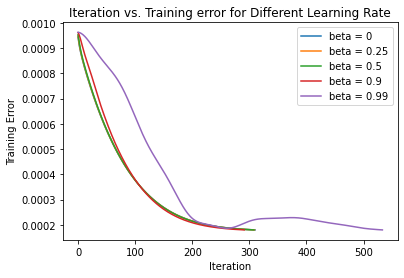

In [ ]:
## Plot Iteration vs Training Error for different momentum value
plt.plot(j0, label = 'beta = 0')
plt.plot(j1, label = 'beta = 0.25')
plt.plot(j2, label = 'beta = 0.5')
plt.plot(j3, label = 'beta = 0.9')
plt.plot(j4, label = 'beta = 0.99')
plt.xlabel('Iteration')
plt.ylabel('Training Error')
plt.legend()
plt.title('Iteration vs. Training error for Different Learning Rate')
plt.show()

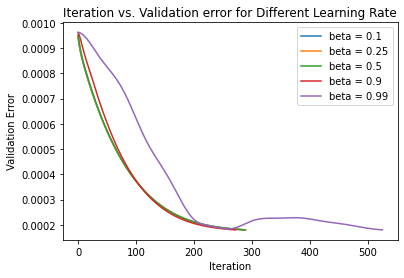

In [ ]:
## Plot Iteration vs Validation Error for different momentum value
plt.plot(p0, label = 'beta = 0')
plt.plot(p1, label = 'beta = 0.25')
plt.plot(p2, label = 'beta = 0.5')
plt.plot(p3, label = 'beta = 0.9')
plt.plot(p4, label = 'beta = 0.99')
plt.xlabel('Iteration')
plt.ylabel('Validation Error')
plt.legend()
plt.title('Iteration vs. Validation error for Different Learning Rate')
plt.show()

**Comment on the effect of momentum.**

Larger momentum coefficient results in faster converge. From above graph when the momentum coefficient is 0.9, it used 292 iterations to decrease the training error to 0.00018, and when the momentum cofficient is 0, it used 311 iterations to decrease the training error ot 0.00018. When the momentun coefficient appoaches to 1, it causes instabilities during training. So that apply the monentum can help to fast the converge rate.
****

## Part 8 - Find a dataset online [3 marks]


Find a dataset online and train a linear model with the techniques you learned to make a prediction. 

*   Introduce your dataset,
*   How did you train your model,
*   Show your results.

Hint: you can find various datasets in here: https://www.kaggle.com/datasets.

To use a dataset in Colab, you can upload it in your Google drive and access it in Colab ([help here](https://medium.com/analytics-vidhya/how-to-fetch-kaggle-datasets-into-google-colab-ea682569851a)), or you can download the dataset on your local machine and upload it directly to Colab using the following script.

```
from google.colab import files
uploaded = files.upload()
```

When submitting your project on Quercus, Please make sure you are also uploading your dataset so we can fully run your notebook.






****
**Description:**

The dataset that I choose is to ranking the world happyness for 2019. The raw data has 6 numerical features and the target that need to predict is the Score column.

To training a model, first, based on the data matrix is invertible, I use the direct solution to get the optimal weight vector and calculate the corresponding training and validation error. Then using the gradient descent to approach to the optimal weight.

As the result, after epoch approximately 550 times, the weight vector get from gradient descent is very close to the one that get from direct solution. The training error is 0.538 and validation error is 0.502, error curve begins to converge around 200 epochs.

In [ ]:
df_happy = pd.read_csv('world_happy_2019.csv' , skipinitialspace=True)
df_happy

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...,...,...
151,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


In [ ]:
data_happy = df_happy.drop(columns = ['Overall rank','Country or region','Score'])
country = df_happy['Country or region']
target_happy = df_happy['Score']
x_train, x_val, y_train, y_val = train_test_split(data_happy, target_happy, test_size = 0.3, random_state = 6)
scaler = preprocessing.StandardScaler()
scaler.fit(x_train)
x_train_std = scaler.transform(x_train) 
x_val_std = scaler.transform(x_val)

In [ ]:
## Expanded x and x_val
X = np.vstack((np.ones(np.shape(x_train_std)[0]), x_train_std.T)).T
X_val = np.vstack((np.ones(np.shape(x_val_std)[0]), x_val_std.T)).T

In [ ]:
# Direct Solution
opt_weight_happy, RMSE_happy, RMSE_val_happy = direct_soultion(X, X_val, y_train, y_val)

The taining error for direct solution (without regularizer) is 0.5382938096235751
The validation error for direct solution (without regularizer) is 0.5026899519325029


In [ ]:
learning_rate = 0.01
epoch = 550
W_happy, RMSE_happy, RMSE_happy_val = gradient_descent(X, X_val, y_train, y_val, learning_rate, epoch)

Epochs :  0  Training Error :  5.481201662180571  Validation Error :  5.420029760324097
Epochs :  50  Training Error :  3.3029897751924895  Validation Error :  3.3458702533362366
Epochs :  100  Training Error :  2.040804786501032  Validation Error :  2.10197185280981
Epochs :  150  Training Error :  1.3069136602926283  Validation Error :  1.3632598618323344
Epochs :  200  Training Error :  0.8995458360274603  Validation Error :  0.9412104483918179
Epochs :  250  Training Error :  0.6929058752530204  Validation Error :  0.7144042150192851
Epochs :  300  Training Error :  0.5996781279723663  Validation Error :  0.6011746950513229
Epochs :  350  Training Error :  0.5616642189901193  Validation Error :  0.5477301341550699
Epochs :  400  Training Error :  0.5470655944083836  Validation Error :  0.5229289927931274
Epochs :  450  Training Error :  0.5416058535117565  Validation Error :  0.5112260530735337
Epochs :  500  Training Error :  0.5395800240226774  Validation Error :  0.5055300790454

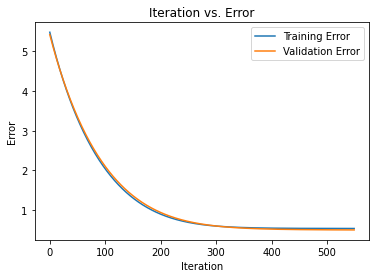

In [ ]:
## Plot Iteration vs Traing error 
plt.plot(RMSE_happy,  label = 'Training Error')
plt.plot(RMSE_happy_val, label = 'Validation Error')
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.legend()
plt.title('Iteration vs. Error')
plt.show()